In [1]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_1229/616493249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [2]:
from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=9)

width  = 3.487
height = width / 1.618 * 1.0

In [3]:
## thickness scan for maximum cut-off energy

thickness = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/thickness_max_energy_F1.txt',
                      delimiter=',',skiprows=1, usecols=0)

maxi_ene  = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/thickness_max_energy_F1.txt',
                      delimiter=',',skiprows=1, usecols=1)

In [4]:
## average over different thicknesses -- with Excel...

thkn = np.array([  1.5,     3,     6,     8,    10,    12,    15])
avee = np.array([17.35, 45.97, 48.84, 51.35, 44.63, 40.15, 39.55])
mine = np.array([15.60, 40.90, 39.90, 49.10, 40.90, 35.20, 34.00])
maxe = np.array([19.10, 49.10, 54.70, 53.60, 47.90, 45.10, 45.10])

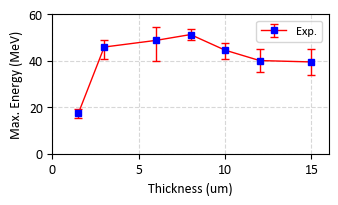

In [5]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

e_err = np.stack([avee - mine, maxe - avee])

ax.errorbar(thkn, avee, yerr=e_err, linewidth=1, 
            # marker='s', 
            markersize=5, 
            marker='s', markerfacecolor='blue', markeredgecolor='blue', linestyle='-', color='red', capsize=3,
            # color='blue', 
            label='Exp.')

ax.set_xlim([0,16])
ax.set_ylim([0,60])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Thickness (um)')
ax.set_ylabel('Max. Energy (MeV)')
ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

plt.show()

In [6]:
fig.savefig('/Users/yao/Desktop/figX_tkn_e.pdf', dpi=600)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
distance   = np.loadtxt('/Users/yao/Desktop/Encircled_Energy_r14,45um.txt',delimiter=' ', usecols=0)
proportion = np.loadtxt('/Users/yao/Desktop/Encircled_Energy_r14,45um.txt',delimiter=' ', usecols=1)

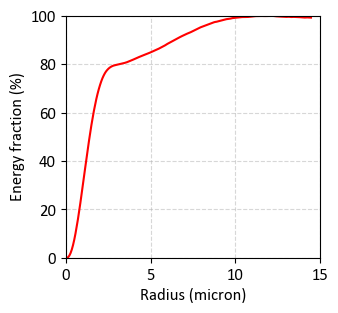

In [16]:
width  = 3.487 * 1.0
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(distance, proportion*100, color='r',lw=1.5,
             linestyle='-',
             # label=r'$n_e$ (100$n_c$)',
           )

ax.set_xlim([0,15])
ax.set_ylim([0,100])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'Radius (micron)')
ax.set_ylabel('Energy fraction (%)')
# ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [17]:
fig.savefig('/Users/yao/Desktop/energy_fraction.pdf',dpi=600) # 保存文件

In [19]:
import pandas as pd

fwhm = pd.read_excel('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/Focal Spot scan 20.4.23.xlsx')

In [20]:
z = np.array(fwhm.loc[:,'pos um'])
fx = np.array(fwhm.loc[:,'FWHM_X [um]'])
fy = np.array(fwhm.loc[:,'FWHM_Y [um]'])

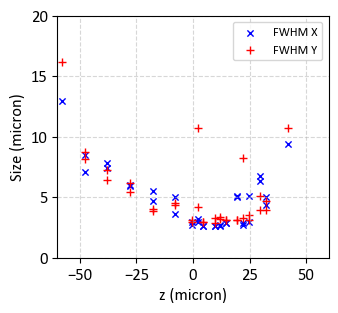

In [22]:
width  = 3.487
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.scatter(z,fx, color='b', marker='x', s=20, lw=1.0,
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label=r'FWHM X',
           )

ax.scatter(z,fy, color='r', marker='+', s=30, lw=1.0,
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label=r'FWHM Y',
           )

ax.set_xlim([-60,60])
ax.set_ylim([0,20])
# plt.title('time = '+str(tt[ts])+' fs')
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'z (micron)')
ax.set_ylabel(r'Size (micron)')

ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

In [23]:
fig.savefig('/Users/yao/Desktop/focal_line.pdf',dpi=600)

Text(0.5, 1.0, 'y = -3ln(x)+14.25')

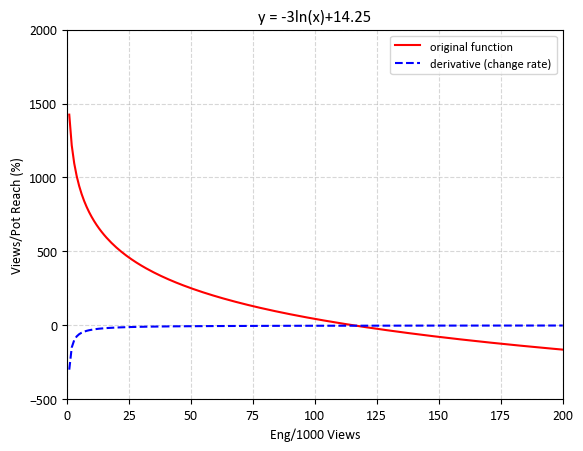

In [8]:
# 画图部分
plt.plot(x,  y*100, label='original function',        color='red') 
plt.plot(x, y1*100, label='derivative (change rate)', color='blue', ls='--')

plt.grid(ls='--',alpha=0.5)
plt.legend()

plt.xlim([0,200])
plt.ylim([-500,2000])

plt.xlabel('Eng/1000 Views')
plt.ylabel('Views/Pot Reach (%)')
plt.title('y = -3ln(x)+14.25')

# plt.savefig('/Users/yao/Desktop/test.pdf',dpi=600) # 保存文件

In [9]:
x = np.linspace(1.0, 50.0, 200)
y = 51. * np.exp(-0.134*x) 
y1 = 51. * (-0.134) * np.exp(-1.134 * x)
# y1 = -1. * 3 / x

(0.0, 50.0)

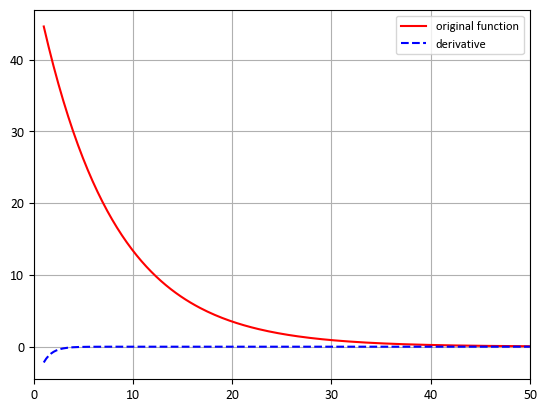

In [10]:
plt.plot(x, y, label='original function', color='red') 
plt.plot(x, y1, label='derivative', color='blue', ls='--')
plt.grid()
plt.legend()
plt.xlim([0,50])
# plt.ylim([-2,14])

8192

In [2]:
math.factorial(abs(l1))

NameError: name 'math' is not defined

In [3]:
import math

In [5]:
l1 = 0
math.factorial(abs(l1))

1

In [14]:
np.loadtxt('/Users/yao/Desktop/wizzler_data_time_profile_log.txt',delimiter=',',usecols=0)

array([-280.2, -274.2, -262.2, -257.4, -249. , -241.8, -238.2, -237. ,
       -235.8, -232.2, -230.4, -225. , -216.6, -209.4, -202.8, -195. ,
       -192. , -187.8, -186. , -184.2, -180.6, -175.8, -173.4, -169.8,
       -167.4, -164.4, -157.8, -153.6, -144.6, -135. , -129.6, -121.8,
       -114.6, -102.6,  -90.6,  -85.8,  -82.2,  -78.6,  -75. ,  -69. ,
        -61.8,  -57.6,  -54. ,  -51. ,  -45.6,  -37.8,  -31.2,  -25.8,
        -22.8,  -18.6,  -14.4,  -10.2,   -4.8,    1.8,    4.2,    8.4,
         12.6,   16.2,   18.6,   22.2,   25.8,   31.8,   46.2,   54.6,
         60. ,   63.6,   66.6,   71.4,   78.6,   88.2,   94.2,  103.8,
        118.2,  127.8,  132.6,  138.6,  145.8,  153.6,  163.8,  177. ,
        187.8,  199.8,  210.6,  220.8,  237. ,  246.6,  255.6,  264.6,
        270.6,  280.2])

In [15]:
axis_time = np.loadtxt('/Users/yao/Desktop/wizzler_data_time_profile_log.txt',delimiter=',',usecols=0)
axis_ampl = np.loadtxt('/Users/yao/Desktop/wizzler_data_time_profile_log.txt',delimiter=',',usecols=1)

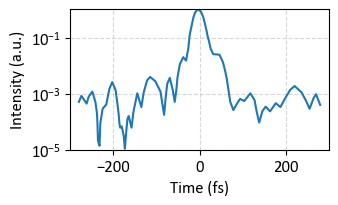

In [35]:
width  = 3.487 * 1.0
height = width / 1.618 * 1.0

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(axis_time, axis_ampl)

ax.set_xlim([-300,300])
# ax.set_xticks([-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
# ax.set_xticklabels([-250, -150,  -50,  50,  150,  250])
ax.set_ylim([1e-5,1])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Intensity (a.u.)')
# ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()
plt.savefig('/Users/yao/Desktop/wizzler.pdf',dpi=600) # 保存文件

In [38]:
axis_wl = np.loadtxt('/Users/yao/Desktop/wizzler_data_spectra_profile.txt',delimiter=',',usecols=0)
axis_ampl = np.loadtxt('/Users/yao/Desktop/wizzler_data_spectra_profile.txt',delimiter=',',usecols=1)

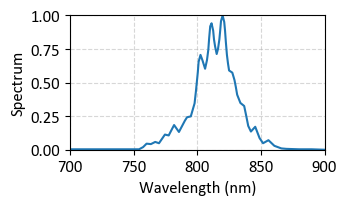

In [43]:
width  = 3.487 * 1.0
height = width / 1.618 * 1.0

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(axis_wl, axis_ampl)

ax.set_xlim([700,900])
# ax.set_xticks([-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
# ax.set_xticklabels([-250, -150,  -50,  50,  150,  250])
ax.set_ylim([0,1])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Spectrum')
# ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()
plt.savefig('/Users/yao/Desktop/wizzler_spec.pdf',dpi=600) # 保存文件